In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
patient_dev = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev.csv')
patient_dev_os = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev_os.csv')
patient_dev_us = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev_us.csv')
patient_dev_smote = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/dev_smote.csv')
patient_test = pd.read_csv('https://raw.githubusercontent.com/tzhou19/AML_project/main/Data/test.csv')

In [3]:
patient_X_dev = patient_dev.drop(columns=['hospital_death'])
patient_y_dev = pd.DataFrame(patient_dev['hospital_death'], index = patient_dev.index)

patient_X_dev_os = patient_dev_os.drop(columns=['hospital_death'])
patient_y_dev_os = pd.DataFrame(patient_dev_os['hospital_death'], index = patient_dev_os.index)

patient_X_dev_us = patient_dev_us.drop(columns=['hospital_death'])
patient_y_dev_us = pd.DataFrame(patient_dev_us['hospital_death'], index = patient_dev_us.index)

patient_X_dev_smote = patient_dev_smote.drop(columns=['hospital_death'])
patient_y_dev_smote = pd.DataFrame(patient_dev_smote['hospital_death'], index = patient_dev_smote.index)

patient_X_test = patient_test.drop(columns=['hospital_death'])
patient_y_test = pd.DataFrame(patient_test['hospital_death'], index = patient_test.index)

In [11]:
patient_X_dev_smote.shape

(134076, 66)

* Standardize the dataset

In [4]:
scaler = StandardScaler()
patient_X_dev = pd.DataFrame(scaler.fit_transform(patient_X_dev), columns = patient_X_dev.columns, index = patient_X_dev.index)
patient_X_test = pd.DataFrame(scaler.transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)

patient_X_dev_os = pd.DataFrame(scaler.fit_transform(patient_X_dev_os), columns = patient_X_dev_os.columns, index = patient_X_dev_os.index)
patient_X_test = pd.DataFrame(scaler.transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)

patient_X_dev_us = pd.DataFrame(scaler.fit_transform(patient_X_dev_us), columns = patient_X_dev_us.columns, index = patient_X_dev_us.index)
patient_X_test = pd.DataFrame(scaler.transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)

patient_X_dev_smote = pd.DataFrame(scaler.fit_transform(patient_X_dev_smote), columns = patient_X_dev_smote.columns, index = patient_X_dev_smote.index)
patient_X_test = pd.DataFrame(scaler.transform(patient_X_test), columns = patient_X_test.columns, index = patient_X_test.index)


* Plot out the graph to see 95% cut of explained variance and choose 46 as the number of component.
* Plot out the graph to see 99% cut of explained variance and choose 57 as the number of component.

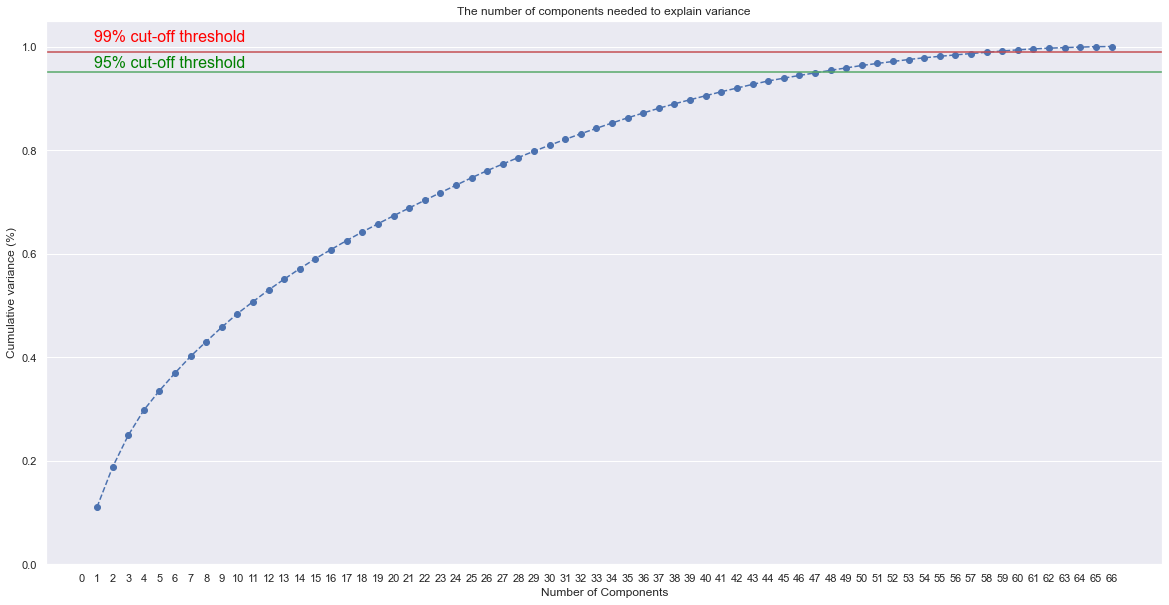

In [5]:
pca = PCA().fit(patient_X_dev)
xi = np.arange(1, 67, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
plt.ylim(0,1.05)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 67, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='g', linestyle='-')
plt.text(0.8, 0.96, '95% cut-off threshold', color = 'green', fontsize=16)

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.8, 1.01, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

* Using the first two components to plot out the graph

C:\Users\Alex\AppData\Local\Temp\ipykernel_12400\1728671337.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


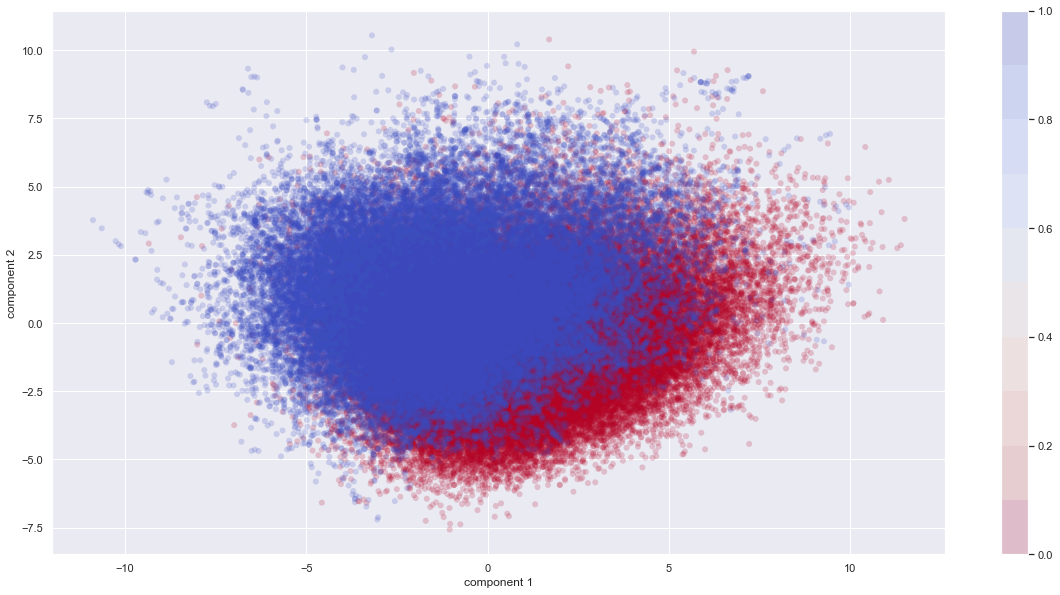

In [6]:
pca_vis = PCA(2)
patient_X_dev_smote_pca_vis = pca_vis.fit_transform(patient_X_dev_smote)
patient_y_dev_smote_pca_vis = patient_dev_smote['hospital_death']
plt.scatter(patient_X_dev_smote_pca_vis[:,0], patient_X_dev_smote_pca_vis[:,1],
            c=patient_y_dev_smote_pca_vis, edgecolor='none', alpha=0.2,
            cmap=plt.cm.get_cmap('coolwarm_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

## TSNE

C:\Users\Alex\AppData\Local\Temp\ipykernel_12400\1480582735.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


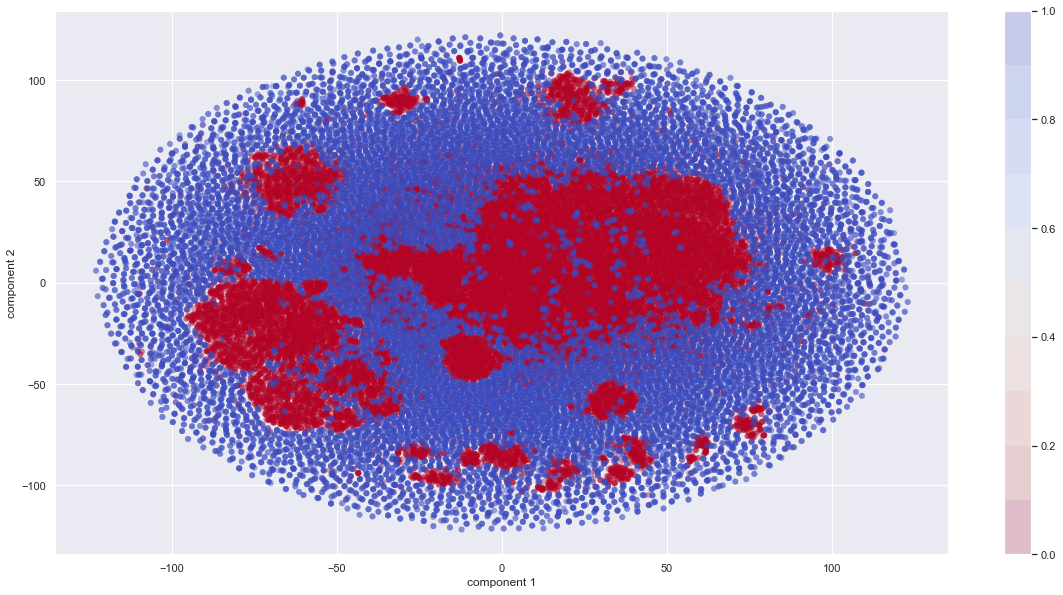

In [8]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
patient_X_dev_smote_tsne = tsne.fit_transform(patient_X_dev_smote)

plt.scatter(patient_X_dev_smote_tsne[:,0], patient_X_dev_smote_tsne[:,1],
            c=patient_y_dev_smote_pca_vis, edgecolor='none', alpha=0.2,
            cmap=plt.cm.get_cmap('coolwarm_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

C:\Users\Alex\AppData\Local\Temp\ipykernel_12400\929601718.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


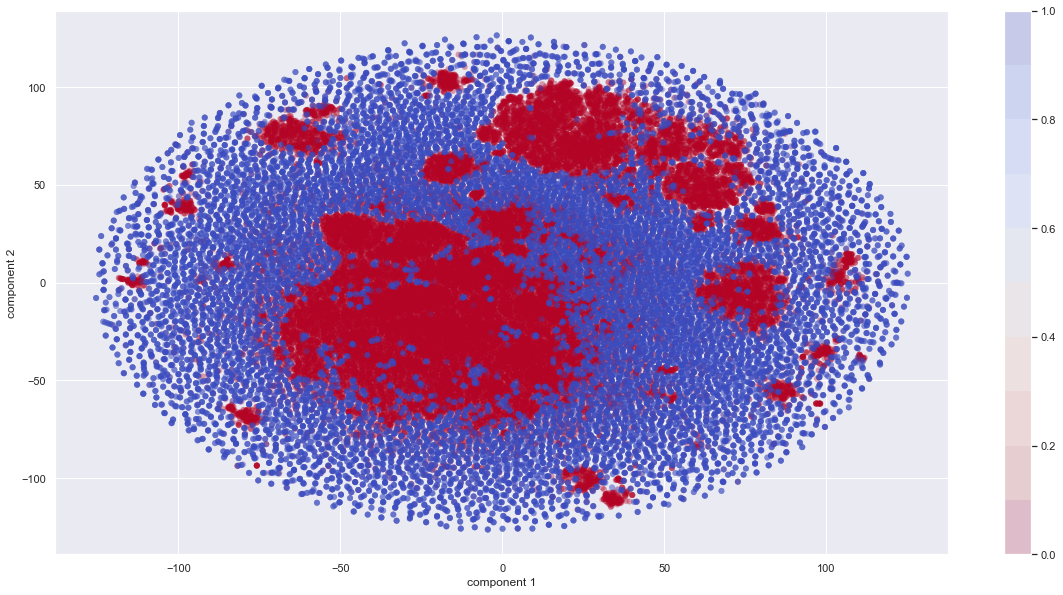

In [12]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
patient_X_dev_smote_tsne = tsne.fit_transform(patient_X_dev_smote)

plt.scatter(patient_X_dev_smote_tsne[:,0], patient_X_dev_smote_tsne[:,1],
            c=patient_y_dev_smote_pca_vis, edgecolor='none', alpha=0.2,
            cmap=plt.cm.get_cmap('coolwarm_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

C:\Users\Alex\AppData\Local\Temp\ipykernel_12400\166172715.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


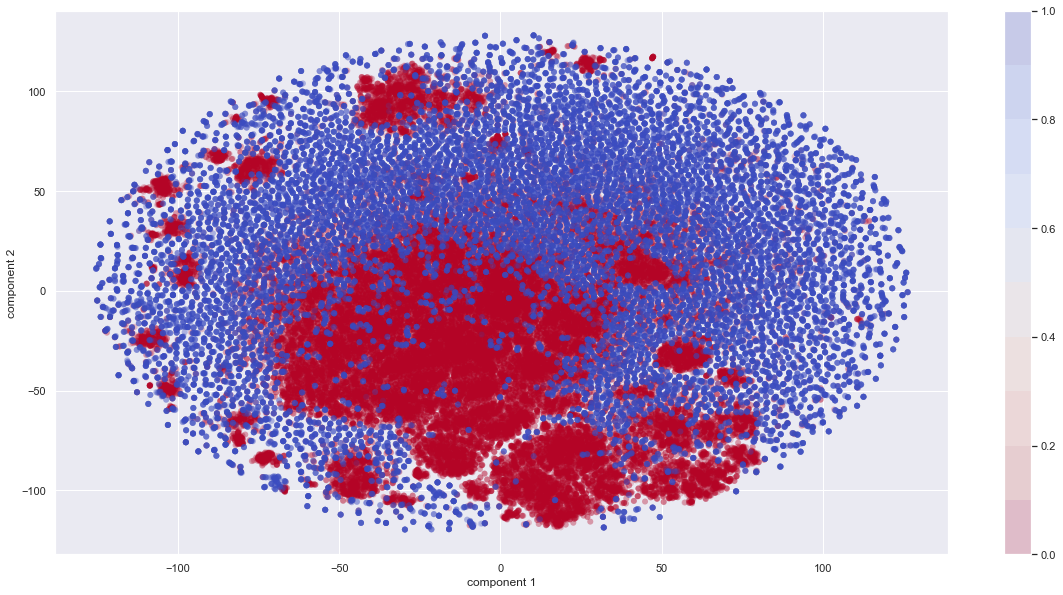

In [13]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10)
patient_X_dev_smote_tsne = tsne.fit_transform(patient_X_dev_smote)

plt.scatter(patient_X_dev_smote_tsne[:,0], patient_X_dev_smote_tsne[:,1],
            c=patient_y_dev_smote_pca_vis, edgecolor='none', alpha=0.2,
            cmap=plt.cm.get_cmap('coolwarm_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

C:\Users\Alex\AppData\Local\Temp\ipykernel_12400\1225284904.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


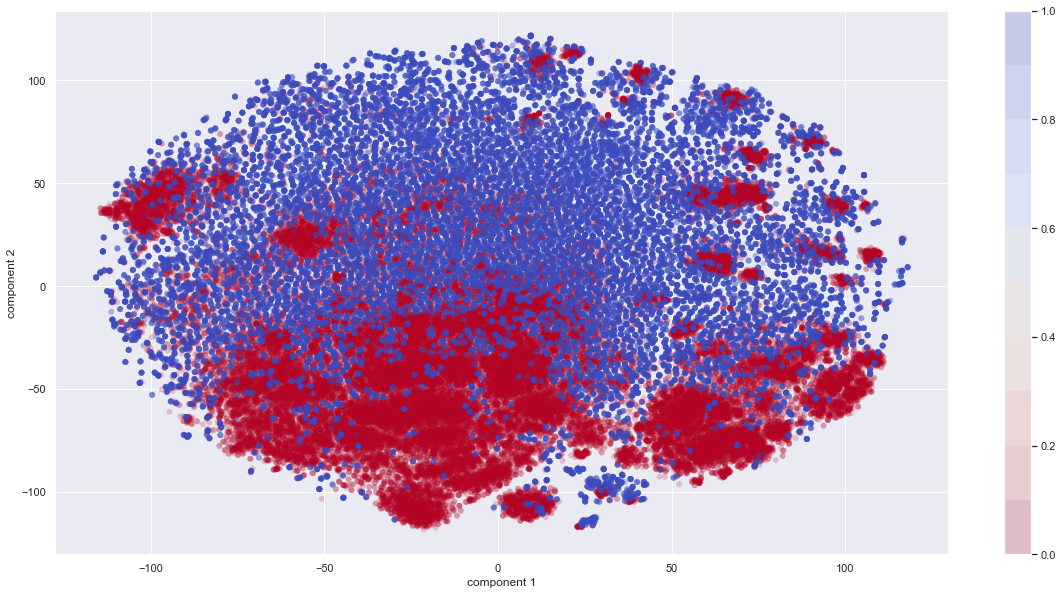

In [14]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30)
patient_X_dev_smote_tsne = tsne.fit_transform(patient_X_dev_smote)

plt.scatter(patient_X_dev_smote_tsne[:,0], patient_X_dev_smote_tsne[:,1],
            c=patient_y_dev_smote_pca_vis, edgecolor='none', alpha=0.2,
            cmap=plt.cm.get_cmap('coolwarm_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50)
patient_X_dev_smote_tsne = tsne.fit_transform(patient_X_dev_smote)

plt.scatter(patient_X_dev_smote_tsne[:,0], patient_X_dev_smote_tsne[:,1],
            c=patient_y_dev_smote_pca_vis, edgecolor='none', alpha=0.2,
            cmap=plt.cm.get_cmap('coolwarm_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

* Apply 95% PCA to all the datasets

In [9]:
pca_95 = PCA(n_components = 0.95)


patient_X_dev_pca95 = pd.DataFrame(pca_95.fit_transform(patient_X_dev), index = patient_X_dev.index)
patient_X_test_pca95 = pd.DataFrame(pca_95.transform(patient_X_test), index = patient_X_test.index)


patient_X_dev_os_pca95 = pd.DataFrame(pca_95.fit_transform(patient_X_dev_os), index = patient_X_dev_os.index)
patient_X_test_os_pca95 = pd.DataFrame(pca_95.transform(patient_X_test), index = patient_X_test.index)

patient_X_dev_us_pca95 = pd.DataFrame(pca_95.fit_transform(patient_X_dev_us), index = patient_X_dev_us.index)
patient_X_test_us_pca95 = pd.DataFrame(pca_95.transform(patient_X_test), index = patient_X_test.index)

patient_X_dev_smote_pca95 = pd.DataFrame(pca_95.fit_transform(patient_X_dev_smote), index = patient_X_dev_smote.index)
patient_X_test_smote_pca95 = pd.DataFrame(pca_95.transform(patient_X_test), index = patient_X_test.index)


* Generate new Dataset with PCA

In [11]:
patient_dev_smote_pca95 = patient_X_dev_smote_pca95.copy()
patient_dev_smote_pca95['hospital_death'] = patient_y_dev
patient_dev_smote_pca95.to_pickle("C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/dev_pca95.pkl")


In [13]:
# Development set
patient_dev_pca95 = patient_X_dev_pca95.copy()
patient_dev_pca95['hospital_death'] = patient_y_dev
patient_dev_pca95.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/dev_pca95.pkl')

patient_dev_os_pca95 = patient_X_dev_os_pca95.copy()
patient_dev_os_pca95['hospital_death'] = patient_y_dev
patient_test.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/dev_os_pca95.pkl')

patient_dev_us_pca95 = patient_X_dev_us_pca95.copy()
patient_dev_us_pca95['hospital_death'] = patient_y_dev
patient_dev_us_pca95.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/dev_us_pca95.pkl')

patient_dev_smote_pca95 = patient_X_dev_smote_pca95.copy()
patient_dev_smote_pca95['hospital_death'] = patient_y_dev
patient_dev_smote_pca95.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/dev_smote_pca95.pkl')

# Test set
patient_test_pca95 = patient_X_test_pca95.copy()
patient_test_pca95['hospital_death'] = patient_y_test
patient_test_pca95.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/test_pca95.pkl')

patient_test_os_pca95 = patient_X_test_os_pca95.copy()
patient_test_os_pca95['hospital_death'] = patient_y_test
patient_test_os_pca95.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/test_os_pca95.pkl')

patient_test_us_pca95 = patient_X_test_us_pca95.copy()
patient_test_us_pca95['hospital_death'] = patient_y_test
patient_test_us_pca95.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/test_us_pca95.pkl')

patient_test_smote_pca95 = patient_X_test_smote_pca95.copy()
patient_test_smote_pca95['hospital_death'] = patient_y_test
patient_test_smote_pca95.to_pickle('C:/Users/Alex/OneDrive - University of Rochester/Desktop/2022Fall/Applied_Machine_Learning/AML_project/Data/test_smote_pca95.pkl')
